In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from __future__ import print_function

# importing deep learning library
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras import backend as K

/Users/saneem/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# Load MNIST data
def load_images(filename):
    f = gzip.open(filename,'r')
    image_size = 28
    
    f.read(16)
    buf = f.read()
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    num_images = len(data)/(image_size*image_size)
    data = data.reshape(num_images, image_size, image_size, 1)
    data = data/255.
    return data

def load_labels(filename):
    f = gzip.open('train-labels-idx1-ubyte.gz','r')
    f.read(8)
    buf = f.read()
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

#------------------------------------------------------#

# Plot images
def plot_images(data_element):
    image = np.asarray(data_element).squeeze()
    plt.imshow(image, cmap='gray')
    plt.show()

#------------------------------------------------------#

# Model creation
def create_cnn_model():
    # input image dimensions
    img_rows, img_cols = 28, 28
    num_classes = 10
    input_shape = (img_rows, img_cols, 1)
    
    model = Sequential()
    model.add(Conv2D(15, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(10, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(),
                  metrics=['accuracy'])
    model.summary()
    return model

#------------------------------------------------------#

# Model training
def train_model(model, x_train, y_train):
    num_classes = len(np.unique(y_train))
    print(num_classes)
    y_train = keras.utils.to_categorical(y_train, num_classes)
    epochs = 10
    batch_size = 128
    model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
    return model

<br>
### Main section starts here.

In [6]:
# loading training data
train_img = load_images('train-images-idx3-ubyte.gz')    
train_labels = load_labels('train-labels-idx1-ubyte.gz')

In [7]:
# loading test data
test_img = load_images('train-images-idx3-ubyte.gz')    
test_labels = load_labels('train-labels-idx1-ubyte.gz')

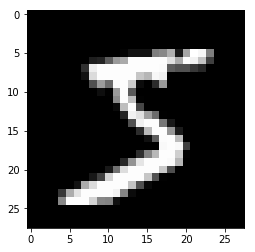

5


In [9]:
# visualizing data: plotting an image and the label.
plot_images(train_img[0])
print(train_labels[0])

In [10]:
# Initializing the model
model = create_cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 15)        150       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        1360      
_________________________________________________________________
flatten_1 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                57610     
Total params: 59,120
Trainable params: 59,120
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = train_model(model, train_img, train_labels)

10
Epoch 1/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.1421 - acc: 0.9600
Epoch 2/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.1283 - acc: 0.9641
Epoch 3/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.1179 - acc: 0.9672
Epoch 4/10
60000/60000 [==============================] - 27s 444us/step - loss: 0.1090 - acc: 0.9695
Epoch 5/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.1016 - acc: 0.9714
Epoch 6/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.0948 - acc: 0.9734
Epoch 7/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.0902 - acc: 0.9744
Epoch 8/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.0855 - acc: 0.9755
Epoch 9/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.0809 - acc: 0.97672s  - ETA: 0s - loss: 0.0809 - acc: 0
Epoch 10/10
60000/60000 [=================

In [15]:
model.predict(test_img[0:1])

array([[4.4975788e-08, 6.0749805e-09, 1.2134295e-05, 2.4021348e-01,
        3.9778372e-12, 7.5972700e-01, 6.6278616e-08, 3.9552774e-06,
        4.1382955e-05, 1.9488666e-06]], dtype=float32)